In [1]:
#importing required libraries
from keras.datasets import cifar100
from tensorflow import keras
import keras, os
import numpy as np
import tensorflow as tf
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, AvgPool2D, concatenate
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Input, Softmax
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import backend as K
from keras import regularizers
from keras.optimizers import Adam

In [2]:
train=True
num_classes = 100
reduction_factor = 8

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train/ 255.0
x_test = x_test/ 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

169009152/169001437 [==============================] - 6s 0us/step


In [3]:
def InceptionA(model):
  model = Conv2D(filters = 32, kernel_size = (1,1), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 32, kernel_size = (1,1), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 32, kernel_size = (1,1), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 48, kernel_size = (3,3), strides = 1, padding ='same' )(model)
  model = BatchNormalization()(model)
  # model = Dropout(0.1)(model)
  maxpool_2 = MaxPool2D(pool_size = (3,3), strides = 1, padding = 'same')(model)
  model = Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = 'same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  # model = BatchNormalization()(model)
  model = keras.layers.LeakyReLU()(model)

  model = concatenate([maxpool_2, model], axis = -1)
  return model

In [4]:
def InceptionB(model):
  model = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 128, kernel_size = (1,7), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 128, kernel_size = (7,1), strides = 1, padding ='same'  )(model)
  model = Conv2D(filters = 128, kernel_size = (1,7), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 128, kernel_size = (7,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 128, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 128, kernel_size = (1,7), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 128, kernel_size = (7,1), strides = 1, padding ='same'  )(model)
  model = BatchNormalization()(model)
  # model = Dropout(0.1)(model)
  # model = keras.layers.Leakyelu()(model)
  maxpool_3 = MaxPool2D(pool_size =(3,3), strides = 1, padding = 'same')(model)
  model = Conv2D(filters = 128, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 128, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  # model = BatchNormalization()(model)
  model = keras.layers.LeakyReLU()(model)

  model = concatenate([maxpool_3, model], axis = -1)
  return model

In [5]:
def InceptionC(model):
  model = Conv2D(filters = 256, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 256, kernel_size = (3,3), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 256, kernel_size = (1,3), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 256, kernel_size = (3,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 256, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 256, kernel_size = (1,3), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 256, kernel_size = (3,1), strides = 1, padding ='same'  )(model)
  model = BatchNormalization()(model)
  # model = Dropout(0.1)(model)
  # model = keras.layers.Leakyelu()(model)
  maxpool_4 = MaxPool2D(pool_size =(3,3), strides = 1, padding = 'same')(model)
  model = Conv2D(filters = 256, kernel_size = (1,1), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  model = Conv2D(filters = 256, kernel_size = (1,1), strides = 1, padding ='same' )(model)
  # model = Dropout(0.1)(model)
  # model = BatchNormalization()(model)
  model = keras.layers.LeakyReLU()(model)

  model = concatenate([maxpool_4, model], axis = -1)
  return model

In [6]:
def Inception_reduction_1(model):
  model = Conv2D(filters = 32, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  model = Conv2D(filters = 64, kernel_size = (3,3), strides = 2, padding ='same'  )(model)
  model = Conv2D(filters = 64, kernel_size = (3,3), strides = 2, padding ='same'  )(model)
  model = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  model = Conv2D(filters = 64, kernel_size = (3,3), strides = 2, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = BatchNormalization()(model)
  model = keras.layers.LeakyReLU()(model)
  maxpool_5 = MaxPool2D(3, strides = 2, padding = 'same')(model)

  model = concatenate([maxpool_5, model], axis = -1)
  return model

In [7]:
def Inception_reduction_2(model):
  model = Conv2D(filters = 128, kernel_size = (3,3), strides = 2, padding ='same'  )(model)
  model = Conv2D(filters = 128, kernel_size = (3,1), strides = 1, padding ='same'  )(model)
  model = Conv2D(filters = 128, kernel_size = (1,3), strides = 1, padding ='same'  )(model)
  model = Conv2D(filters = 128, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  model = Conv2D(filters = 128, kernel_size = (3,3), strides = 2, padding ='same'  )(model)
  model = Conv2D(filters = 128, kernel_size = (1,1), strides = 1, padding ='same'  )(model)
  # model = Dropout(0.1)(model)
  model = BatchNormalization()(model)
  model = keras.layers.LeakyReLU()(model)
  maxpool_6 = MaxPool2D(3, strides = 2, padding = 'same')(model)

  model = concatenate([maxpool_6, model], axis = -1)
  return model

In [8]:
x_shape = keras.Input((32, 32, 3))

num_inceptionA = 2
num_inceptionB = 3
num_inceptionC = 1

model = Conv2D(filters = 32, kernel_size = (3,3), strides = 2, padding ='same'  )(x_shape)
# model = Dropout(0.1)(model)
model = Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding ='same'  )(model)
# model = Dropout(0.1)(model)
model = Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding ='same'  )(model)
model = BatchNormalization()(model)
model = keras.layers.LeakyReLU()(model)
# model = Dropout(0.1)(model)
maxpool_1 = MaxPool2D(pool_size = (3,3), strides = 2)(model)

model = Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding ='same'  )(model)
# model = Dropout(0.1)(model)
model = Conv2D(filters = 128, kernel_size = (3,3), strides = 2, padding ='same'  )(model)
# model = BatchNormalization()(model)
# model = Dropout(0.1)(model)
model = Conv2D(filters = 128, kernel_size = (3,3), strides = 1, padding ='same'  )(model)
# model = Dropout(0.1)(model)
model = BatchNormalization()(model)
model = keras.layers.LeakyReLU()(model)

for i in range(num_inceptionA):
  model = InceptionA(model)

# model = Inception_reduction_1(model)

for i in range(num_inceptionB):
  model = InceptionB(model)

# model = Inception_reduction_2(model)

for i in range(num_inceptionC):
  model = InceptionC(model)

avgpool = AvgPool2D(pool_size = (1,1))(model)
# Connected Layers
flatten = Flatten()(avgpool)
dense = Dense(4096)(flatten)
dense_act = keras.layers.LeakyReLU()(dense)
# model = Dropout(0.4)(model)
dense100 = Dense(100, activation = 'softmax')(dense_act)

# Create model
model1 = keras.Model(x_shape, dense100)
model1.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   18496       conv2d_1[0][0]                   
_______________________________________________________________________________________

In [9]:
model1.compile(optimizer=SGD(lr=0.001,decay= 1e-06, momentum=0.9, nesterov=True),
                loss='categorical_crossentropy',
                metrics=['accuracy', 'Precision', 'Recall'])

In [10]:
batch_size = 128

checkpoint = ModelCheckpoint("InceptionV2_SGD_batchnormalizaton", monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=True, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=2, mode='auto')


datagen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             rotation_range = 10,
                             horizontal_flip = True,
                             vertical_flip = False,
                             fill_mode = 'nearest')
# datagen = ImageDataGenerator()
# datagen.fit(x_train)

# hist = model1.fit(x_train, y_train,
#                     steps_per_epoch=x_train.shape[0]//batch_size,
#                     epochs=100,
#                     validation_data=(x_test, y_test),callbacks=[checkpoint, early],verbose=2)
hist = model1.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    epochs=100,
                    validation_data=(x_test, y_test),callbacks=[checkpoint, early],verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.06150, saving model to InceptionV2_SGD_batchnormalizaton
390/390 - 41s - loss: 3.9449 - accuracy: 0.1054 - precision: 0.3691 - recall: 0.0148 - val_loss: 4.3442 - val_accuracy: 0.0615 - val_precision: 0.3284 - val_recall: 0.0133
Epoch 2/100

Epoch 00002: val_accuracy improved from 0.06150 to 0.19500, saving model to InceptionV2_SGD_batchnormalizaton
390/390 - 40s - loss: 3.4394 - accuracy: 0.1739 - precision: 0.5363 - recall: 0.0366 - val_loss: 3.3499 - val_accuracy: 0.1950 - val_precision: 0.4995 - val_recall: 0.0497
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.19500 to 0.22210, saving model to InceptionV2_SGD_batchnormalizaton
390/390 - 40s - loss: 3.2213 - accuracy: 0.2128 - precision: 0.5742 - recall: 0.0549 - val_loss: 3.2228 - val_accuracy: 0.2221 - val_precision: 0.5456 - val_recall: 0.0760
Epoch 4/100

Epoch 00004: val_accuracy imp

In [11]:
model1.save_weights('InceptionV2_SGD_batchnormalization.h5') 

In [12]:
model1.load_weights(filepath = 'InceptionV2_SGD_batchnormalization.h5')
scores = model1.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Precison: %.2f%%" % (scores[2]*100))
print("Recall: %.2f%%" % (scores[3]*100))

Accuracy: 44.54%
Precison: 60.90%
Recall: 36.53%


Text(0.5, 1.0, 'recall')

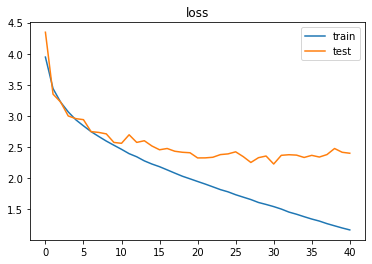

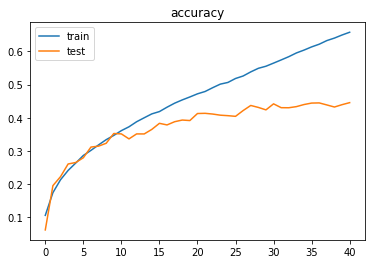

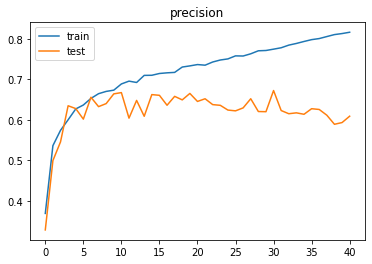

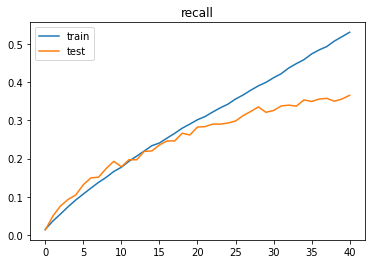

In [13]:
# Plotting loss, accuracy, precision, recall
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.figure()
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.legend(['train','test'])
plt.title('precision')
plt.figure()
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.legend(['train','test'])
plt.title('recall')

In [14]:
# Printing saved weights in numpy arrays
for layer in model1.layers: 
  print(layer.get_weights())

Streaming output truncated to the last 5000 lines.
           7.10079074e-02,  1.23045288e-01,  1.34107312e-02],
         [-3.25929523e-02, -2.64926217e-02, -7.06070242e-03, ...,
          -5.67729920e-02, -3.26117128e-02,  3.43319103e-02],
         ...,
         [-4.51289974e-02, -5.23906536e-02,  6.33605048e-02, ...,
           6.00253381e-02, -4.70750704e-02, -3.23066376e-02],
         [ 1.06056839e-01,  1.11914491e-02,  3.13040055e-02, ...,
          -9.62426960e-02,  2.43320540e-02,  4.22761291e-02],
         [ 7.91591629e-02, -7.38019869e-02, -4.36809063e-02, ...,
           5.21012805e-02,  3.03660575e-02, -3.43976058e-02]],

        [[ 4.14459556e-02, -2.57965419e-02, -4.26097475e-02, ...,
          -3.94408442e-02, -5.18733598e-02, -3.10458317e-02],
         [ 7.87966773e-02,  9.71335694e-02,  2.79737674e-02, ...,
          -2.60521304e-02,  2.71250103e-02, -4.68271151e-02],
         [-4.08066697e-02,  6.20680973e-02, -2.83494755e-03, ...,
           5.55549003e-02,  8.3516046